In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

## Подход 1: градиентный бустинг "в лоб"

1) Считайте таблицу с признаками из файла features.csv с помощью кода, приведенного выше. Удалите признаки, связанные с итогами матча (они помечены в описании данных как отсутствующие в тестовой выборке).

In [34]:
data = pd.read_csv('features.csv', index_col='match_id')
data_test = pd.read_csv('features_test.csv',index_col='match_id')
data.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16.0,2449,0,4,1974,3,63


In [35]:
print data.shape
print data_test.shape

(97230, 108)
(17177, 102)


In [72]:
col_t = list()
for i in data.columns:
    p=0
    for j in data_test.columns:
        if i==j:
            p=1
    if p==0:
        col_t.append(i)
col_t = np.array(col_t)
print col_t.shape
print col_t

(6L,)
['duration' 'radiant_win' 'tower_status_radiant' 'tower_status_dire'
 'barracks_status_radiant' 'barracks_status_dire']


In [73]:
y = data['radiant_win'] #выделение целевой переменной
X = data.drop(col_t,axis=1)

In [74]:
X.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0


In [ ]:
for i in X.columns:
    print X[str(i)].unique().shape, i

2) Проверьте выборку на наличие пропусков с помощью функции count(), которая для каждого столбца показывает число заполненных значений. Много ли пропусков в данных? Запишите названия признаков, имеющих пропуски, и попробуйте для любых двух из них дать обоснование, почему их значения могут быть пропущены.

In [78]:
X.shape

(97230, 102)

In [115]:
X.count() #число значений без пропусков

start_time                     97230
lobby_type                     97230
r1_hero                        97230
r1_level                       97230
r1_xp                          97230
r1_gold                        97230
r1_lh                          97230
r1_kills                       97230
r1_deaths                      97230
r1_items                       97230
r2_hero                        97230
r2_level                       97230
r2_xp                          97230
r2_gold                        97230
r2_lh                          97230
r2_kills                       97230
r2_deaths                      97230
r2_items                       97230
r3_hero                        97230
r3_level                       97230
r3_xp                          97230
r3_gold                        97230
r3_lh                          97230
r3_kills                       97230
r3_deaths                      97230
r3_items                       97230
r4_hero                        97230
r

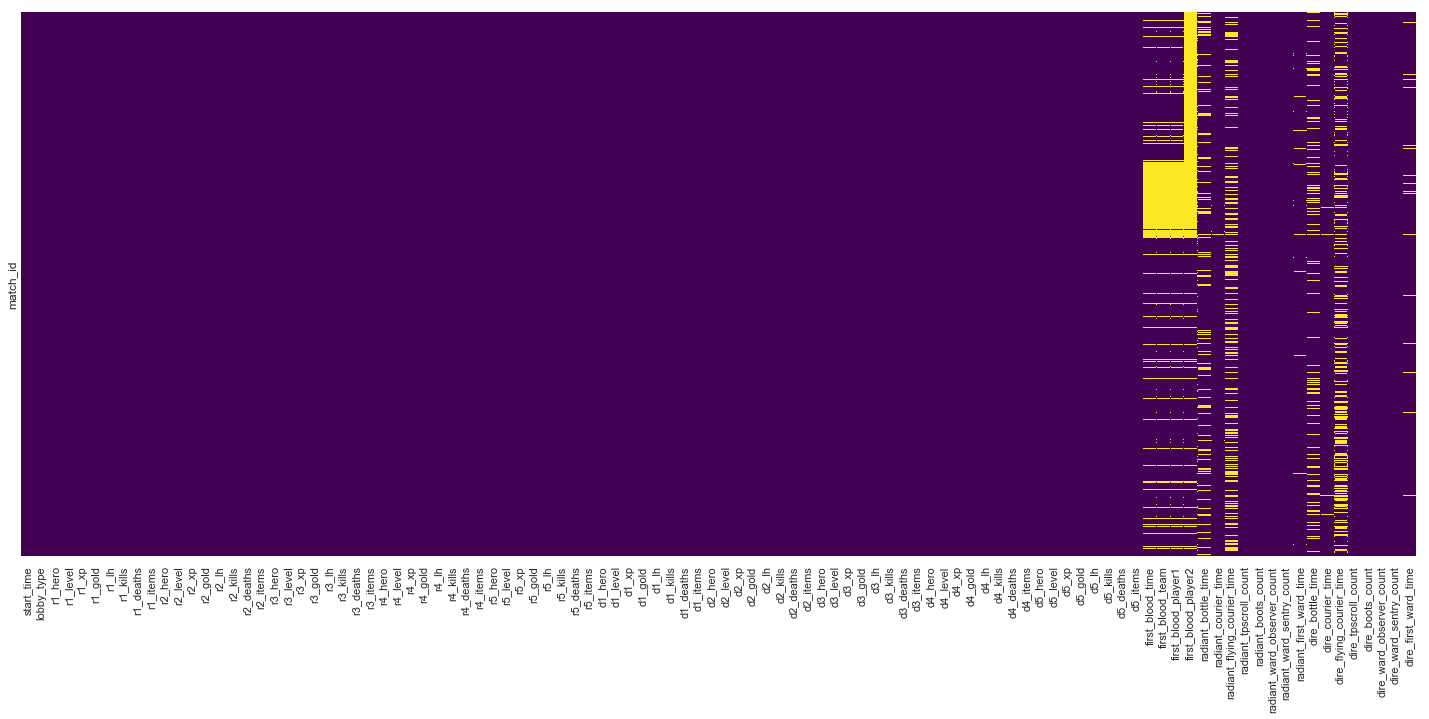

In [107]:
plt.figure(figsize=(25,10))
ax = seaborn.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [109]:
X.isnull().sum() #число значений с пропусками

start_time                         0
lobby_type                         0
r1_hero                            0
r1_level                           0
r1_xp                              0
r1_gold                            0
r1_lh                              0
r1_kills                           0
r1_deaths                          0
r1_items                           0
r2_hero                            0
r2_level                           0
r2_xp                              0
r2_gold                            0
r2_lh                              0
r2_kills                           0
r2_deaths                          0
r2_items                           0
r3_hero                            0
r3_level                           0
r3_xp                              0
r3_gold                            0
r3_lh                              0
r3_kills                           0
r3_deaths                          0
r3_items                           0
r4_hero                            0
r

In [124]:
X.columns[X.isnull().sum()!=0] #признаки, имеющие пропуска в данных

Index([u'first_blood_time', u'first_blood_team', u'first_blood_player1',
       u'first_blood_player2', u'radiant_bottle_time', u'radiant_courier_time',
       u'radiant_flying_courier_time', u'radiant_first_ward_time',
       u'dire_bottle_time', u'dire_courier_time', u'dire_flying_courier_time',
       u'dire_first_ward_time'],
      dtype='object')

'first_blood_time', u'first_blood_team' - данные признаки имеют пропуска т.к. они показывают время совершения первого убийства и какая команда совершила его, пропуска же означают, что убийств не было.

3) Замените пропуски на нули с помощью функции fillna(). На самом деле этот способ является предпочтительным для логистической регрессии, поскольку он позволит пропущенному значению не вносить никакого вклада в предсказание. Для деревьев часто лучшим вариантом оказывается замена пропуска на очень большое или очень маленькое значение — в этом случае при построении разбиения вершины можно будет отправить объекты с пропусками в отдельную ветвь дерева. Также есть и другие подходы — например, замена пропуска на среднее значение признака. Мы не требуем этого в задании, но при желании попробуйте разные подходы к обработке пропусков и сравните их между собой.

In [125]:
X[X.isnull()]=0 #Замена пропусков на 0

4) Какой столбец содержит целевую переменную? Запишите его название.

## Столбец 'radiant_win' содержит итог матча : 1, если победила команда Radiant, 0 — иначе

5) Забудем, что в выборке есть категориальные признаки, и попробуем обучить градиентный бустинг над деревьями на имеющейся матрице "объекты-признаки". Зафиксируйте генератор разбиений для кросс-валидации по 5 блокам (KFold), не забудьте перемешать при этом выборку (shuffle=True), поскольку данные в таблице отсортированы по времени, и без перемешивания можно столкнуться с нежелательными эффектами при оценивании качества. Оцените качество градиентного бустинга (GradientBoostingClassifier) с помощью данной кросс-валидации, попробуйте при этом разное количество деревьев (как минимум протестируйте следующие значения для количества деревьев: 10, 20, 30). Долго ли настраивались классификаторы? Достигнут ли оптимум на испытанных значениях параметра n_estimators, или же качество, скорее всего, продолжит расти при дальнейшем его увеличении?

In [127]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

rang = KFold(n_splits=5, shuffle=True, random_state=241)
n_tree = [10,20,30]

In [130]:
import time
import datetime
auc_score = list()
for tree in n_tree:
    start_time = datetime.datetime.now()
    model = GradientBoostingClassifier(n_estimators=tree)
    score = cross_val_score(estimator=model, X=X, y=y, cv=rang,scoring='roc_auc')
    print 'Time elapsed:', datetime.datetime.now() - start_time
    auc_score.append(score.mean())

Time elapsed: 0:00:23.809000
Time elapsed: 0:00:43.394000
Time elapsed: 0:01:02.495000


Text(0,0.5,'auc_score')

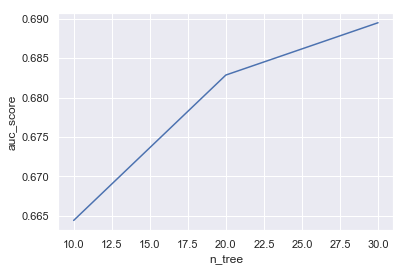

In [133]:
plt.plot(n_tree,auc_score[:3])
plt.xlabel('n_tree')
plt.ylabel('auc_score')

Оптимум на испытанных значениях параметра n_estimators не достигнут. Очевидно, что качество продолжит расти при дальнейшем увеличении параметра n_estimators.
На обучение 30деревьев методом градиентого бустинга потребовалось 1минута 2 секунды. Для ускорения процесса обучения можно попробовать использовать стохастический градиентный бустинг (обучение каждого алгоритма по случайной подвыборке)

# Подход 2: логистическая регрессия

Отмасштабируем все признаки, включая категориальные, что является не лучшим решением

In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_transform = scaler.fit_transform(X)

C:\Users\Vladuk\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Vladuk\Anaconda2\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


1) Оцените качество логистической регрессии (sklearn.linear_model.LogisticRegression с L2-регуляризацией) с помощью кросс-валидации по той же схеме, которая использовалась для градиентного бустинга. Подберите при этом лучший параметр регуляризации (C). Какое наилучшее качество у вас получилось? Как оно соотносится с качеством градиентного бустинга? Чем вы можете объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?

In [142]:
from sklearn.linear_model import LogisticRegression
C = np.linspace(0.1,2.1,10)
score_lr = list()
for c in C:
    log_reg_model = LogisticRegression(C=c)
    start_time = datetime.datetime.now()
    score = cross_val_score(estimator=log_reg_model, X=X_transform, y=y, cv=rang,scoring='roc_auc')
    score_lr.append(score.mean())
    print 'Time elapsed:', datetime.datetime.now() - start_time
print score_lr

Time elapsed: 0:00:16.737000
Time elapsed: 0:00:17.442000
Time elapsed: 0:00:16.818000
Time elapsed: 0:00:16.716000
Time elapsed: 0:00:16.786000
Time elapsed: 0:00:16.701000
Time elapsed: 0:00:16.726000
Time elapsed: 0:00:16.751000
Time elapsed: 0:00:16.738000
Time elapsed: 0:00:16.808000
[0.7163100836533355, 0.7163077044840698, 0.7163072933598695, 0.7163069099188201, 0.7163066366067395, 0.7163065307261238, 0.716306549730532, 0.71630653277369, 0.7163065306574867, 0.7163064925476345]


Text(0,0.5,'auc_score')

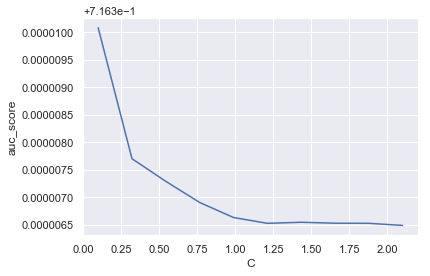

In [143]:
plt.plot(C,score_lr)
plt.xlabel('C')
plt.ylabel('auc_score')

Наилучшим параметром С оказывается С=0 (т.е очень сильная регуляризация), при этом качество auc_score примерно 0.71631 при любом C, что несколько больше оценки при градиентном бустинге. Кроме того, можно отметить, что логистическая регрессия работает быстрее, чем градиентный бустинг (16sec vs 23sec - best_result)

2) Среди признаков в выборке есть категориальные, которые мы использовали как числовые, что вряд ли является хорошей идеей. Категориальных признаков в этой задаче одиннадцать: lobby_type и r1_hero, r2_hero, ..., r5_hero, d1_hero, d2_hero, ..., d5_hero. Уберите их из выборки, и проведите кросс-валидацию для логистической регрессии на новой выборке с подбором лучшего параметра регуляризации. Изменилось ли качество? Чем вы можете это объяснить?

In [145]:
categorial = ['lobby_type', 'r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero', 'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero']
X_wc = X.drop(categorial,axis=1)
X_transform = scaler.fit_transform(X_wc)

In [195]:
from sklearn.linear_model import LogisticRegression
C = list(np.power(10.0, np.arange(-10, 10)))
score_lr = list()
for c in C:
    log_reg_model = LogisticRegression(C=c)
    start_time = datetime.datetime.now()
    score = cross_val_score(estimator=log_reg_model, X=X_transform, y=y, cv=rang,scoring='roc_auc')
    score_lr.append(score.mean())
    print 'Time elapsed:', datetime.datetime.now() - start_time
print score_lr

Time elapsed: 0:00:58.861000
Time elapsed: 0:00:02.343000
Time elapsed: 0:00:02.766000
Time elapsed: 0:00:02.759000
Time elapsed: 0:00:03.192000
Time elapsed: 0:00:04.092000
Time elapsed: 0:00:06.525000
Time elapsed: 0:00:11.342000
Time elapsed: 0:00:14.962000
Time elapsed: 0:00:17.124000
Time elapsed: 0:00:16.608000
Time elapsed: 0:00:16.313000
Time elapsed: 0:00:15.490000
Time elapsed: 0:00:15.506000
Time elapsed: 0:00:15.601000
Time elapsed: 0:00:16.005000
Time elapsed: 0:00:15.538000
Time elapsed: 0:00:15.982000
Time elapsed: 0:00:16.425000
Time elapsed: 0:00:16.151000
[0.6870798106831687, 0.6870798106831687, 0.6870904351030955, 0.68718645789489, 0.6881091217515607, 0.6950569329910983, 0.7112483906159718, 0.7162355910206267, 0.7164009506527343, 0.7163737844721111, 0.7163707526581122, 0.7163704793048005, 0.7163704962706652, 0.7163705301659757, 0.7163705301674705, 0.7163705280495243, 0.7163705280495243, 0.7163705280495243, 0.7163705280495243, 0.7163705280495243]


Text(0,0.5,'auc_score')

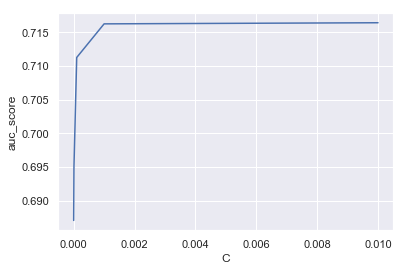

In [201]:
plt.plot(C[:9],score_lr[:9])
plt.xlabel('C')
plt.ylabel('auc_score')

После удаления категориальных признаков качество немного выросло auc_score = 0.7164, при С=0.001. Данное увеличение качество вызвано тем, что категориальные несут в себе определенный смысл и их усреднение вызывает увеличение ошибки.

3) На предыдущем шаге мы исключили из выборки признаки rM_hero и dM_hero, которые показывают, какие именно герои играли за каждую команду. Это важные признаки — герои имеют разные характеристики, и некоторые из них выигрывают чаще, чем другие. Выясните из данных, сколько различных идентификаторов героев существует в данной игре (вам может пригодиться фукнция unique или value_counts).

In [158]:
categorial_hero = ['r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero', 'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero']
X_cat = X[categorial_hero]
X_cat.head()

,r1_hero,r2_hero,r3_hero,r4_hero,r5_hero,d1_hero,d2_hero,d3_hero,d4_hero,d5_hero
match_id,,,,,,,,,,
0,11,67,29,20,105,4,42,21,37,84
1,42,49,67,37,26,39,88,79,7,12
2,33,98,20,27,4,22,66,86,29,80
3,29,30,75,37,41,96,48,15,102,20
4,13,27,30,72,93,26,69,22,25,8


In [167]:
r1_hero = pd.DataFrame(X_cat['r1_hero'].value_counts())
r2_hero = pd.DataFrame(X_cat['r2_hero'].value_counts())
r3_hero = pd.DataFrame(X_cat['r3_hero'].value_counts())
r4_hero = pd.DataFrame(X_cat['r4_hero'].value_counts())
r5_hero = pd.DataFrame(X_cat['r5_hero'].value_counts())
d1_hero = pd.DataFrame(X_cat['d1_hero'].value_counts())
d2_hero = pd.DataFrame(X_cat['d2_hero'].value_counts())
d3_hero = pd.DataFrame(X_cat['d3_hero'].value_counts())
d4_hero = pd.DataFrame(X_cat['d4_hero'].value_counts())
d5_hero = pd.DataFrame(X_cat['d5_hero'].value_counts())

In [168]:
df_hero = r1_hero.join(r2_hero)
df_hero = df_hero.join(r3_hero)
df_hero = df_hero.join(r4_hero)
df_hero = df_hero.join(r5_hero)
df_hero = df_hero.join(d1_hero)
df_hero = df_hero.join(d2_hero)
df_hero = df_hero.join(d3_hero)
df_hero = df_hero.join(d4_hero)
df_hero = df_hero.join(d5_hero)

In [169]:
df_hero.head()

,r1_hero,r2_hero,r3_hero,r4_hero,r5_hero,d1_hero,d2_hero,d3_hero,d4_hero,d5_hero
11,5045,4128,3885,3609,3499,4030,3493,3250,2988,3023
7,3899,4201,4235,4564,4552,3844,4106,4223,4408,4321
72,3551,3468,3501,3423,3377,3544,3385,3454,3385,3374
39,3341,3008,3032,2740,2797,3527,3108,3128,2986,2945
112,3119,3639,3585,3741,3851,3169,3657,3598,3802,3759


In [172]:
df_hero.sum(axis=1)[:10] #сколько раз выбирали каждого конкретного героя

11     36950
7      42353
72     34462
39     30612
112    35920
50     34602
100    28509
21     23980
25     22467
71     26031
dtype: int64

In [174]:
df_hero.shape #т.е. всего выбирали 108 различных героев 

(108, 10)

Второй способ получения всех идентификаторов, выбранных героев:

In [186]:
X_U = X_cat.get_values().reshape((972300,1))
X_U = pd.DataFrame(X_U)

In [190]:
id_hero = X_U[X_U.columns[0]].unique()

In [191]:
id_hero.shape 

(108L,)

4) Воспользуемся подходом "мешок слов" для кодирования информации о героях. Пусть всего в игре имеет N различных героев. Сформируем N признаков, при этом i-й будет равен нулю, если i-й герой не участвовал в матче; единице, если i-й герой играл за команду Radiant; минус единице, если i-й герой играл за команду Dire. Ниже вы можете найти код, который выполняет данной преобразование. Добавьте полученные признаки к числовым, которые вы использовали во втором пункте данного этапа.

In [202]:
# N — количество различных героев в выборке
N = 112
X_pick = np.zeros((data.shape[0], N))
for i, match_id in enumerate(data.index):
    for p in xrange(5):
        X_pick[i, data.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, data.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1

C:\Users\Vladuk\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Vladuk\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [204]:
X_pick.shape #закодированные категориальные признаки

(97230L, 112L)

In [205]:
X_transform.shape #данные без категориальных признаков

(97230L, 91L)

In [206]:
X_all = np.concatenate([X_transform, X_pick], axis=1) #объединим данные 

5) Проведите кросс-валидацию для логистической регрессии на новой выборке с подбором лучшего параметра регуляризации. Какое получилось качество? Улучшилось ли оно? Чем вы можете это объяснить?

In [208]:
C = list(np.power(10.0, np.arange(-10, 5)))
score_lr = list()
for c in C:
    log_reg_model = LogisticRegression(C=c)
    start_time = datetime.datetime.now()
    score = cross_val_score(estimator=log_reg_model, X=X_all, y=y, cv=rang,scoring='roc_auc')
    score_lr.append(score.mean())
    print 'Time elapsed:', datetime.datetime.now() - start_time
print score_lr

Time elapsed: 0:00:02.518000
Time elapsed: 0:00:02.224000
Time elapsed: 0:00:02.740000
Time elapsed: 0:00:02.820000
Time elapsed: 0:00:03.282000
Time elapsed: 0:00:04.155000
Time elapsed: 0:00:06.574000
Time elapsed: 0:00:13.755000
Time elapsed: 0:00:22.536000
Time elapsed: 0:00:30.767000
Time elapsed: 0:00:31.632000
Time elapsed: 0:00:31.971000
Time elapsed: 0:00:32.309000
Time elapsed: 0:00:32.228000
Time elapsed: 0:00:32.080000
[0.6892924200162789, 0.6892924200162789, 0.689305540053909, 0.6894183410010479, 0.6905221182427813, 0.6991713216855027, 0.7250221492762781, 0.7462962333706958, 0.7517359589697445, 0.7519375215436417, 0.7519197376318821, 0.7519171318848324, 0.7519171467132457, 0.7519171912560226, 0.7519172251623998]


Text(0,0.5,'auc_score')

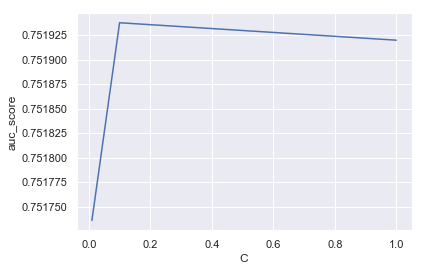

In [213]:
plt.plot(C[8:11],score_lr[8:11])
plt.xlabel('C')
plt.ylabel('auc_score')

Наилучший результат достигается при C=0.1, оценка auc_score составляет 0.7519375, что больше чем при использовании логистической регрессии  на данных без категориальных признаков. Это можно объяснить тем, что категориальные признаки несут в себе информацию о способностях героев, что влияет на результат игры.

6) Постройте предсказания вероятностей победы команды Radiant для тестовой выборки с помощью лучшей из изученных моделей (лучшей с точки зрения AUC-ROC на кросс-валидации). Убедитесь, что предсказанные вероятности адекватные — находятся на отрезке [0, 1], не совпадают между собой (т.е. что модель не получилась константной).

In [216]:
log_reg_model = LogisticRegression(C=0.1)
log_reg_model.fit(X=X_all,y=y)

[1 1 1 ... 0 0 1]


In [218]:
pred_prob = log_reg_model.predict_proba(X=X_all)
pred = log_reg_model.predict(X=X_all)
print pred

[1 1 1 ... 0 0 1]


In [219]:
from sklearn.metrics import accuracy_score
print accuracy_score(pred,y) #точность предсказания на обучающей выборке

0.6850663375501388


# Подготовка тестовой выборки

In [221]:
X_test = data_test
X_test[X_test.isnull()]=0

In [222]:
categorial = ['lobby_type', 'r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero', 'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero']
X_test_wc = X_test.drop(categorial,axis=1)
X_test_transform = scaler.transform(X_test_wc)

C:\Users\Vladuk\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [223]:
N = 112
X_pick_test = np.zeros((data_test.shape[0], N))
for i, match_id in enumerate(data_test.index):
    for p in xrange(5):
        X_pick_test[i, data_test.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick_test[i, data_test.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1

C:\Users\Vladuk\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\Vladuk\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [224]:
print X_pick_test.shape #закодированные категориальные признаки
print X_test_transform.shape #данные

(17177L, 112L)
(17177L, 91L)


In [225]:
X_all_test = np.concatenate([X_test_transform, X_pick_test], axis=1) #объединим данные 

In [226]:
pred_prob = log_reg_model.predict_proba(X=X_all_test)
pred = log_reg_model.predict(X=X_all_test) #предсказания на тестовой выборке
print pred_prob

[[0.17606051 0.82393949]
 [0.24704771 0.75295229]
 [0.81193823 0.18806177]
 ...
 [0.76549516 0.23450484]
 [0.37498672 0.62501328]
 [0.57395384 0.42604616]]


In [229]:
print 'max_prob=', pred_prob.max() #максимальные и минимальные значения прогноза
print 'min_prob=', pred_prob.min()

max_prob= 0.9963708843074068
min_prob= 0.0036291156925931656


In [255]:
answer_df = pd.DataFrame(pred_prob,index=X_test.index, columns=['radiant_lose','radiant_win_prob'])

In [256]:
answer_df = answer_df.drop('radiant_lose',axis=1)
answer_df.index.name='match_id_hash'
answer_df.head()

,radiant_win_prob
match_id_hash,
6,0.823939
7,0.752952
10,0.188062
13,0.861663
16,0.240156


In [257]:
answer_df.to_csv('dota_pred.csv')